In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as sc

# Exercise 2

### A - Perceptron Learning Rule

You can run this a few times to see whether a single problem converges or not for different P,N values.

In [20]:
P = 100
N = 50
eta = 1
max_epochs = 1000

# generate random samples and corresponding random targets and weights
x = np.random.choice((-1, 1), size=(P, N)).astype(np.float64)
y = np.random.choice((-1, 1), size=P)  #targets should be ±1
w = np.random.choice((-1, 1), size=N).astype(np.float64)

def misclassified_count(x, y, w):
    return sum([1 for xi, yi in zip(x, y) if np.sign(np.dot(xi, w)) != yi]) #sum over all vectors that are misclassified [vector * weights =! target]

initial_misclassified = misclassified_count(x, y, w)
for _ in range(max_epochs):
    for xi, yi in zip(x, y):
        prediction = np.sign(np.dot(xi, w))
        if prediction != yi:   # if prediction of target is wrong, update the weight, else do nothing
            w += eta * yi * xi

    # check for convergence
    if misclassified_count(x, y, w) == 0:
        break

final_misclassified = misclassified_count(x, y, w)
if final_misclassified == 0:
    print("Converged!")
    print(f"Initial misclassified count: {initial_misclassified}")
    print(f"Final Misclassified count: {final_misclassified}")
else:
    print(f"Did not converge ;(")
    print(f"Initial misclassified count: {initial_misclassified} ")
    print(f"Final Misclassified count: {final_misclassified}")


Converged!
Initial misclassified count: 53
Final Misclassified count: 0


### B - Convergence check

We put the previous code in a function to be able to call it multiple times, we check for convergence using Booleans:

In [21]:
def perceptron_convergence(N, P, max_epochs=1000):
    # Generate random samples and corresponding random labels
    x = np.random.choice((-1, 1), size=(P, N)).astype(np.float64)
    y = np.random.choice((-1, 1), size=P)
    w = np.random.choice((-1, 1), size=N).astype(np.float64)

    for _ in range(max_epochs):
        for xi, yi in zip(x, y):
            prediction = np.sign(np.dot(xi, w))
            if prediction != yi:
                w += yi * xi
        if misclassified_count(x,y,w) == 0:
            return True

    return False

We run this for a set of P vals below 2N, and a set of vals for above 2N. We check the convergence rates for multiple runs, thus for multiple problems and return the average convergence rate.

In [22]:
N = 50
P_vals = [50,75,100,125,150]
nruns = 100

# test for P < 2N
P_vals_less = [50,60,70,80,90]
success_rates_less = []
for P in P_vals_less:
    successes = sum([perceptron_convergence(N, P) for _ in range(nruns)]) #run the test 100 times, take the average
    success_rate = successes / 100.0
    success_rates_less.append(success_rate)

# Test for P > 2N
P_vals_more = [110,120,130,140,150]
success_rates_more = []
for P in P_vals_more:
    successes = sum([perceptron_convergence(N, P) for _ in range(nruns)])
    success_rate = successes / 100.0
    success_rates_more.append(success_rate)

# Display the results
print("P < 2N success rates:")
for P, rate in zip(P_vals_less, success_rates_less):
    print(f"P = {P}: {rate * 100}%")

print("\nP > 2N success rates:")
for P, rate in zip(P_vals_more, success_rates_more):
    print(f"P = {P}: {rate * 100}%")


P < 2N success rates:
P = 50: 100.0%
P = 60: 100.0%
P = 70: 100.0%
P = 80: 97.0%
P = 90: 80.0%

P > 2N success rates:
P = 110: 10.0%
P = 120: 0.0%
P = 130: 0.0%
P = 140: 0.0%
P = 150: 0.0%


We see, as expected, that below 2N the convergence rate is above 50%, 100% in most cases. Above 2N the convergence rate drops quickly to zero. 

### C - C(P,N) curve reconstruction

This is just a more elaborate version of our previous code. We update the perceptron function to return the same boolean array, but now also the error rate and the number of iterations. We also define a function that computes the statistics. The convergence rate of these experiments defines the C(P,N) curve. We plot this curve versus P and also the curves for the errors and iterations.

In [23]:
def perceptron_experiment(N, P, max_epochs=1000):
    x = np.random.choice((-1, 1), size=(P, N)).astype(np.float64)
    y = np.random.choice((-1, 1), size=P)
    w = np.random.choice((-1, 1), size=N).astype(np.float64)
    iterations = 0

    for _ in range(max_epochs):
        iterations += 1
        for xi, yi in zip(x, y):
            prediction = np.sign(np.dot(xi, w))
            if prediction != yi:
                w += yi * xi
        if misclassified_count(x, y, w) == 0:
            break

    error = misclassified_count(x,y,w) / P
    converged = error == 0
    return converged, error, iterations

def compute_statistics(N, P, nruns):
    convergences, errors, iterations_list = [], [], []
    for _ in range(nruns):
        converged, error, iterations = perceptron_experiment(N, P)
        
        convergences.append(converged)
        errors.append(error)
        iterations_list.append(iterations)

    convergence_fraction = sum(convergences) / nruns
    error_mean, error_std = np.mean(errors), np.std(errors)
    iteration_mean, iteration_std = np.mean(iterations_list), np.std(iterations_list)

    return convergence_fraction, error_mean, error_std, iteration_mean, iteration_std

def plot_CP_N_curve(P_vals, statistics):
    convergence_fractions, error_means, error_stds, iteration_means, iteration_stds = zip(*statistics)
    plt.figure(figsize=(15, 5))
    
    #convergence plot
    plt.subplot(1, 3, 1)
    plt.plot(P_vals, convergence_fractions, marker='o', linestyle='-', color = '#7617DF')
    plt.title('Convergence Fraction vs P')
    plt.xlabel('P')
    plt.ylabel('Convergence Fraction')
    plt.grid(True)
    
    #mean error plot
    plt.subplot(1, 3, 2)
    plt.errorbar(P_vals, error_means, yerr=error_stds, marker='o', linestyle='-', color='#DF7617', capsize=5, label=f'1 std')
    plt.title('Mean Classification Error vs P')
    plt.xlabel('P')
    plt.ylabel('Mean Classification Error')
    plt.grid(True)
    plt.legend(loc='upper right')

    #mean iteration plot
    plt.subplot(1, 3, 3)
    plt.errorbar(P_vals, iteration_means, yerr=iteration_stds, marker='o', linestyle='-', color='#17DF76', capsize=5, label=f'1 std')
    plt.title('Mean Iterations vs P')
    plt.xlabel('P')
    plt.ylabel('Mean Iterations')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

I choose P values 70-120 with a finer grating, because that is where the interesting behaviour actually starts.

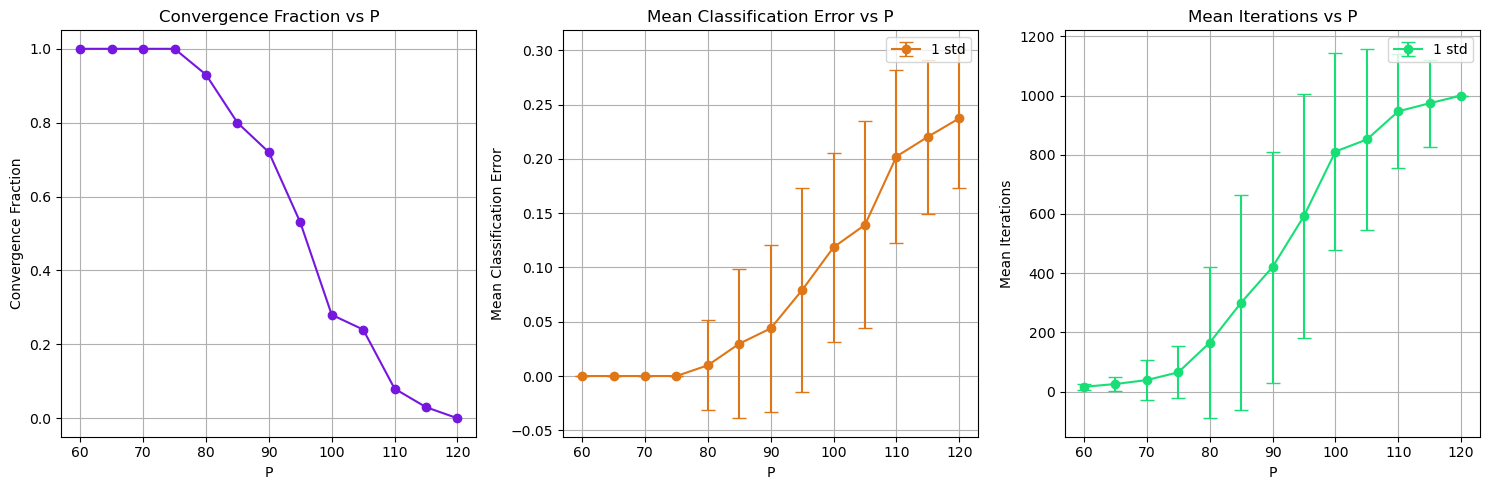

In [24]:
N = 50
P_vals = np.arange(60,125,5)
nruns = 100
max_epochs = 1000
success_rates = []

statistics = [compute_statistics(N, P, nruns) for P in P_vals]
plot_CP_N_curve(P_vals, statistics)

We see that the convergence, mean errors and iterations expect as behaved. More interesting, is the std bars. We see that near P = 2N these are the largest, meaning that at that region the convergence is the most unpredictable and there is a lot of variance in the results. 

# Exercise 3

In [25]:
def c(P,N):
    # defining c(P,N)
    iterations = np.arange(0,N)
    n = list(map(lambda i: sc.binom(P-1,i),iterations))
    return(2*np.sum(n))

def c_bound(N,P):
    # defining c_bound
    c_bound = (math.e*P/N)**N
    return c_bound

In [26]:
# computing C(P,N) and their bounds for P = 0 to P = 200
Ps = np.arange(0,200)
cs = np.zeros(200)
bounds = np.zeros(200)
for p in Ps:
    bounds[p]=c_bound(50,p+1)
    cs[p]=c(p+1,50)

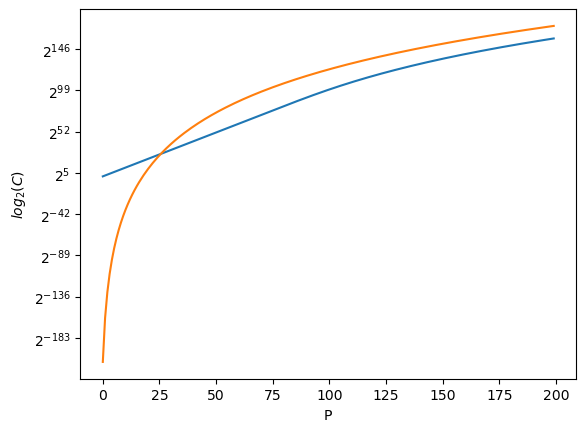

In [27]:
# plotting results for values of P
plt.plot(Ps,cs)
plt.plot(Ps,bounds)
plt.yscale("log",base=2)
plt.ylabel("$log_2 (C)$")
plt.xlabel("P")
plt.show()

# Exercise 4

### A - Finding P for $\epsilon \approx 0.1$

In [28]:
def epsilon(N,P):
    # finding epsilon
    delta = 0.001
    return np.sqrt(-8/P * np.log(delta/(4*c_bound(N,2*P))))

For ϵ = 0.1 and N = 10, P = 46655


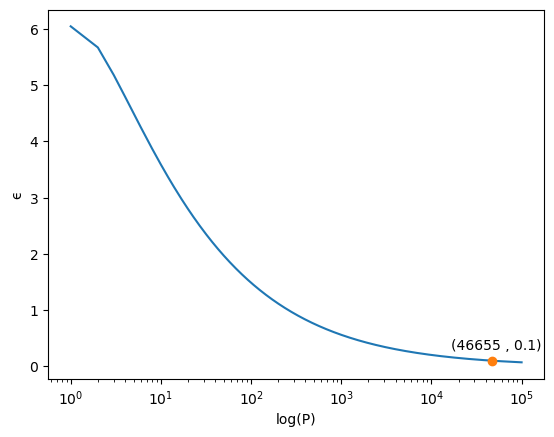

In [29]:
# computing the value of P for which epsilon = 0.01 and plotting the dependence of epsilon on P for N = 10
p_list = np.arange(1,100000)
epsilon_list = np.zeros(99999)
N = 10
found_p = False

for p in p_list:
    epsilon_list[p-1] = epsilon(N,2*p)
    if ((epsilon_list[p-1] <= 0.1) and (found_p == False)):
        p_final = p
        epsilon_final = epsilon_list[p-1]
        found_p=True
        print("For ϵ = 0.1 and N = 10, P = " + str(p_final))
        continue

plt.plot(p_list,epsilon_list)
plt.plot(p_final, epsilon_list[p_final], marker = "o")
plt.annotate("("+str(p_final)+" , "+str(round(epsilon_list[p_final],5))+")",
             (p_final-30000, epsilon_list[p_final]+0.2))
plt.xlabel("log(P)")
plt.ylabel("ϵ")
plt.xscale("log")

Text(0, 0.5, 'amount of patterns P')

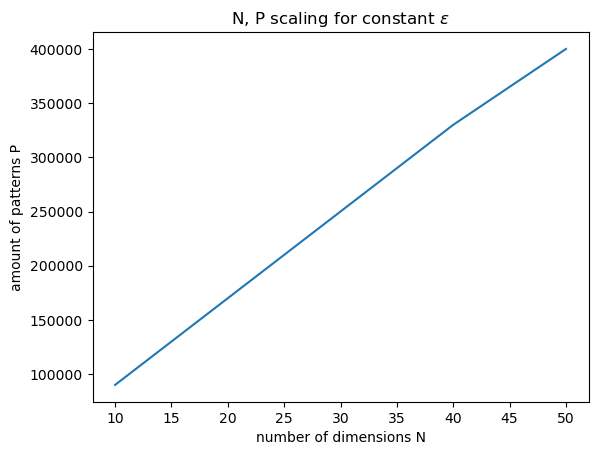

In [30]:
# setting N = [10, 20, 30, 40, 50] and varying P for $\epsilon \approx 0.1$ we get the expected linear increase
N = [10,20,30,40,50]
P = [90000,170000,250000,330000,400000]
plt.plot(N, P)
plt.title('N, P scaling for constant $\epsilon$')
plt.xlabel('number of dimensions N')
plt.ylabel('amount of patterns P')

### B - Teacher-Student Model

In [31]:
def perceptron_learning(xi, y, N, max_epochs=1000):
    #adapted from exercise 2
    w = np.random.randn(N)
    for _ in range(max_epochs):
        for i in range(xi.shape[1]):
            prediction = np.sign(np.dot(w, xi[:, i]))
            if prediction != y[i]:
                w += y[i] * xi[:, i]
    return w

In [32]:
N = 10
P_values = [10, 50, 100, 500, 1000]
P_test = 10000
n_learning_runs = 100
w_teacher = np.random.randn(N) #random but fixed teacher vector

table = []

for P in P_values:
    xi_train = np.random.choice([-1, 1], size=(N, P))
    y_train  =  np.sign(xi_train.T @ w_teacher) #compute the teacher labels
    
    xi_test = np.random.choice([-1, 1], size=(N, P_test))
    y_test  = np.sign(xi_test.T @ w_teacher) 
    
    epsilons = []
    
    for run in range(n_learning_runs):
        w_student = perceptron_learning(xi_train, y_train, N)
        y_pred = np.sign(xi_test.T @ w_student)
        epsilon = np.mean(y_pred != y_test)
        epsilons.append(epsilon)
    
    average_epsilon = np.mean(epsilons)
    
    # Compute epsilon from the generalization bound
    delta = 0.01
    bound_epsilon = np.sqrt(8 * np.log(4 * P * (2 * P_test) / delta) / P)
    
    table.append([P, average_epsilon, bound_epsilon])

# Print the table
print("P\tNumerical Epsilon\tBound Epsilon")
for row in table:
    print(f"{row[0]}\t{row[1]:.5f}\t\t\t{row[2]:.5f}")

P	Numerical Epsilon	Bound Epsilon
10	0.20721			3.81550
50	0.06878			1.78020
100	0.03925			1.28063
500	0.00636			0.59477
1000	0.00027			0.42711


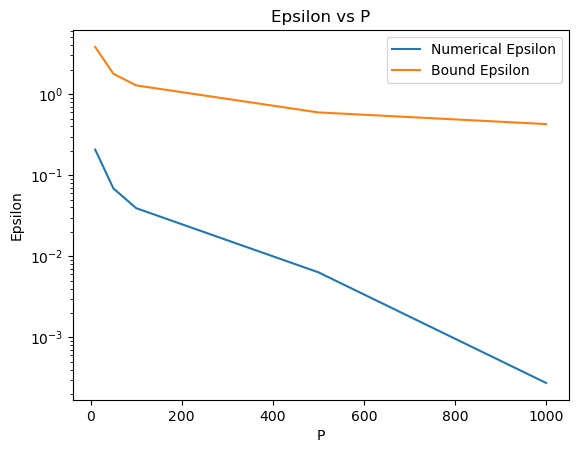

In [33]:
# plot the data
P_values = [row[0] for row in table]
numerical_epsilons = [row[1] for row in table]
bound_epsilons = [row[2] for row in table]

plt.plot(P_values, numerical_epsilons, label='Numerical Epsilon')
plt.plot(P_values, bound_epsilons, label='Bound Epsilon')
plt.xlabel('P')
plt.ylabel('Epsilon')
plt.yscale('log')
plt.title('Epsilon vs P')
plt.legend()
plt.show()

We see that for small P values, the theoretical bound is somewhat close to numerical bound [same order of magnitude at least], but once we increase P, the theoretical bound is much higher than the numerical bound. This is because the theoretical bound is a worst case scenario, and the numerical bound is an average case scenario.